In [2]:
!pip install pandas scikit-learn qiskit qiskit-machine-learning seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: qiskit━━━━╸━━━━━━━━━━━━━  8/12 [pandas]learn]
    Found existing installation: qiskit 2.1.0━━━━━━━━━━━━━  8/12 [pandas]
    Uninstalling qiskit-2.1.0:╸━━━━━━━━━━━━━  8/12 [pandas]
      Successfully uninstalled qiskit-2.1.0m━━━━━━━━━━━━━  8/12 [pandas]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [qiskit-machine-learning]-machine-learning]


In [8]:
# Cell 1: Import libraries and create molecular dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create synthetic molecular dataset (drug-like vs non-drug-like)
def create_molecular_dataset():
    """Create synthetic molecular descriptors dataset"""
    # Generate features representing molecular descriptors
    X, y = make_classification(
        n_samples=200,          # Small dataset for quantum computer
        n_features=4,           # 4 molecular descriptors
        n_informative=4,        # All features are informative
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=42
    )
    
    # Scale to represent realistic molecular descriptors
    X[:, 0] = X[:, 0] * 100 + 300   # Molecular Weight (200-400)
    X[:, 1] = X[:, 1] * 2 + 2       # LogP (-2 to 6)
    X[:, 2] = np.abs(X[:, 2]) * 5   # Hydrogen Bond Donors (0-10)
    X[:, 3] = np.abs(X[:, 3]) * 3   # Aromatic Rings (0-6)
    
    # Create feature names
    feature_names = ['Molecular_Weight', 'LogP', 'HBD', 'Aromatic_Rings']
    
    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['Drug_Like'] = y  # 1 = drug-like, 0 = non-drug-like
    
    return df, X, y

# Generate dataset
print("Creating molecular dataset...")
df, X, y = create_molecular_dataset()

print(f"Dataset created: {len(df)} molecules")
print(f"Features: {list(df.columns[:-1])}")
print(f"Drug-like molecules: {sum(y)}")
print(f"Non-drug-like molecules: {len(y) - sum(y)}")

# Display first few rows
print("\nSample molecules:")
print(df.head())

Creating molecular dataset...
Dataset created: 200 molecules
Features: ['Molecular_Weight', 'LogP', 'HBD', 'Aromatic_Rings']
Drug-like molecules: 102
Non-drug-like molecules: 98

Sample molecules:
   Molecular_Weight      LogP        HBD  Aromatic_Rings  Drug_Like
0        218.191199  0.817491   8.179764        3.250512          1
1         93.730071 -1.998094   8.863911        0.192109          0
2        241.750073  3.514320   8.445509        3.426293          1
3        196.695304  0.669775  10.576463        3.170778          0
4        166.225589 -2.991377   7.826271        0.200921          0


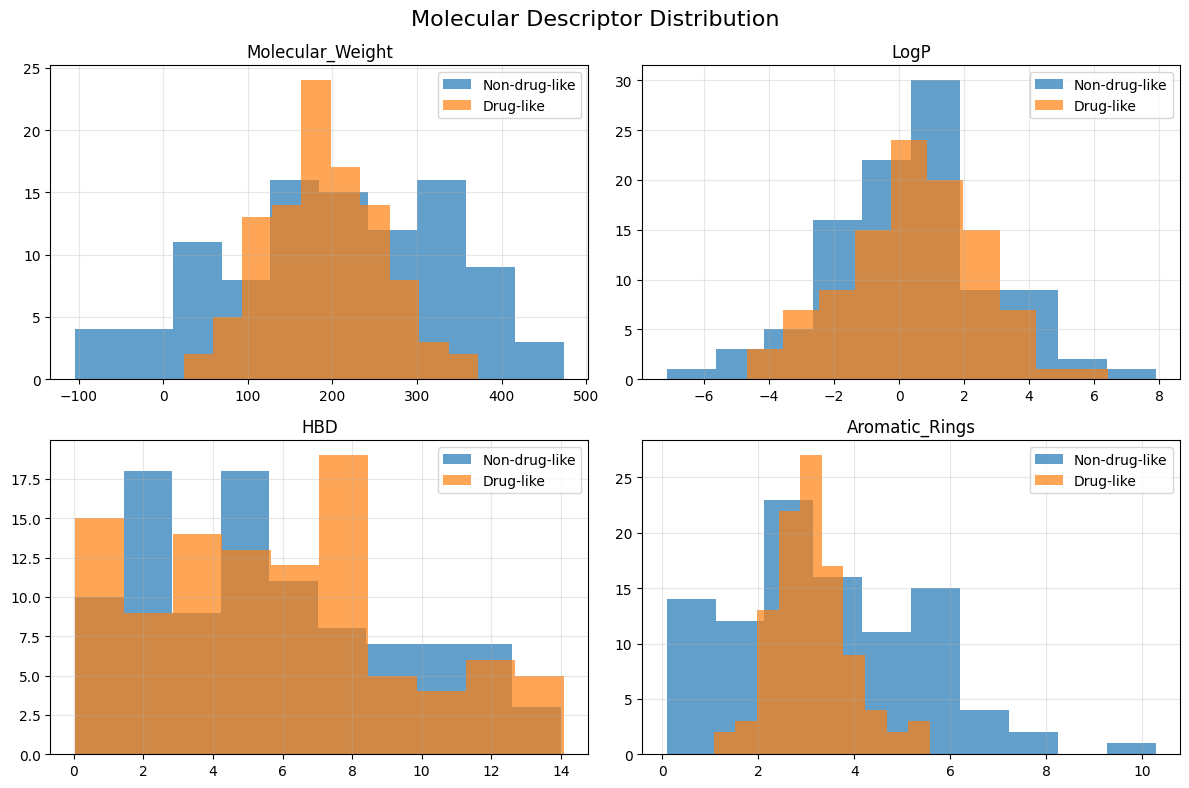

In [9]:
# Cell 2: Visualize the molecular data
# Visualize the dataset
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Molecular Descriptor Distribution', fontsize=16)

for i, feature in enumerate(df.columns[:-1]):
    ax = axes[i//2, i%2]
    for class_val in [0, 1]:
        class_data = df[df['Drug_Like'] == class_val][feature]
        ax.hist(class_data, alpha=0.7, label=f'{"Drug-like" if class_val else "Non-drug-like"}')
    ax.set_title(feature)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Cell 3: Prepare data for machine learning
print("Preparing data for quantum machine learning...")

# Standardize features (important for quantum ML)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} molecules")
print(f"Test set: {len(X_test)} molecules")
print("Data preparation complete!")

# Test Qiskit installation
print("\n Testing Qiskit installation...")
try:
    from qiskit import QuantumCircuit
    from qiskit_aer import AerSimulator
    
    # Create simple test circuit
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    
    # Test simulator
    simulator = AerSimulator()
    print(" Qiskit working perfectly!")
    print(" Using AerSimulator (no IBM account needed)")
    print(f" Dataset ready: {len(X_train)} training, {len(X_test)} test molecules")
    
except ImportError as e:
    print(f" Qiskit import error: {e}")
    print("Run: pip install qiskit qiskit-aer qiskit-machine-learning")

Preparing data for quantum machine learning...
Training set: 140 molecules
Test set: 60 molecules
Data preparation complete!

 Testing Qiskit installation...
 Qiskit working perfectly!
 Using AerSimulator (no IBM account needed)
 Dataset ready: 140 training, 60 test molecules


In [6]:
pip install qiskit qiskit-aer qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
